In [132]:
# Project Title Next Movie Production
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [133]:
# Q1 Actors and their correlation to a movie's success
#Ideas:
    # Top 10-20 Actors based on Movie revenue
    # Top 10-20 Actors based on Ratings
    # Is there a Lead Actor that starred in more than 1 Movie that is part of the Top 100 Movies based on revenue
    # Highest number of Movies that Actor is part of and average revenue across all movies

#Read the CSV and create first dataframe
df = pd.read_csv("../Cleaned Data/cleaned_movie_data.csv")
df.head()

,Movie ID,Title,Average Rating (Out of 10),Number of User Ratings,TMDb Popularity Score,Gross Revenue,Net Revenue,Net Revenue (% Over Budget),Budget,Release Date,...,Genre 3,Genre 4,Genre 5,Runtime (Minutes),1st Billing,2nd Billing,3rd Billing,4th Billing,5th Billing,Director
0,11688,The Emperor's New Groove,7.5,6007,86.051,169327687,69327687,0.693277,100000000,2000-12-15,...,Comedy,Family,Fantasy,78,David Spade,John Goodman,Eartha Kitt,Patrick Warburton,Wendie Malick,Mark Dindal
1,4247,Scary Movie,6.3,6247,88.909,278019771,259019771,13.632620,19000000,2000-07-07,...,NaN,NaN,NaN,88,Anna Faris,Jon Abrahams,Marlon Wayans,Shawn Wayans,Regina Hall,Keenen Ivory Wayans
2,9600,Big Momma's House,5.8,2096,81.102,173959438,143959438,4.798648,30000000,2000-05-31,...,NaN,NaN,NaN,98,Martin Lawrence,Nia Long,Paul Giamatti,Jascha Washington,Terrence Howard,Raja Gosnell
3,98,Gladiator,8.2,16708,67.513,465361176,362361176,3.518070,103000000,2000-05-04,...,Adventure,NaN,NaN,155,Russell Crowe,Joaquin Phoenix,Connie Nielsen,Oliver Reed,Richard Harris,Ridley Scott
4,955,Mission: Impossible II,6.1,5985,64.994,546388105,421388105,3.371105,125000000,2000-05-24,...,Thriller,NaN,NaN,123,Tom Cruise,Dougray Scott,Thandiwe Newton,Ving Rhames,Richard Roxburgh,John Woo


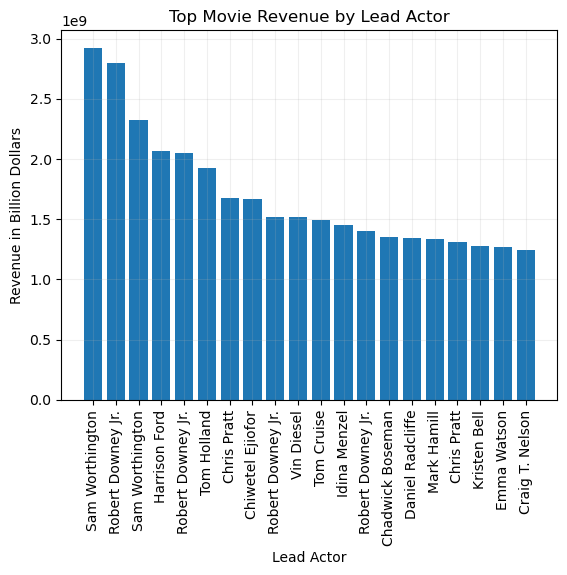

<Figure size 640x480 with 0 Axes>

In [134]:
#Top 10-20 Actors based on Movie revenue
actor_rev = df[["Gross Revenue", "1st Billing", "Title"]]

#Sort to highest revenue
top_actor_rev = actor_rev.sort_values("Gross Revenue", ascending=False).head(20)
top_actor_rev = top_actor_rev[["1st Billing", "Gross Revenue"]]
top_actor_rev.set_index("1st Billing", inplace=True)
top_actor_rev

x = np.arange(len(top_actor_rev))
tic_loc = [value for value in x]

plt.bar(x, top_actor_rev["Gross Revenue"], align='center')
plt.xticks(tic_loc, top_actor_rev.index, rotation="vertical")
plt.xlabel("Lead Actor")
plt.ylabel("Revenue in Billion Dollars")
plt.title("Top Movie Revenue by Lead Actor")
plt.yscale("linear")
plt.grid(alpha=.2)

plt.show()
plt.savefig('../../Analysis/Visualizations/batch2_topactorbyrevenue.png')



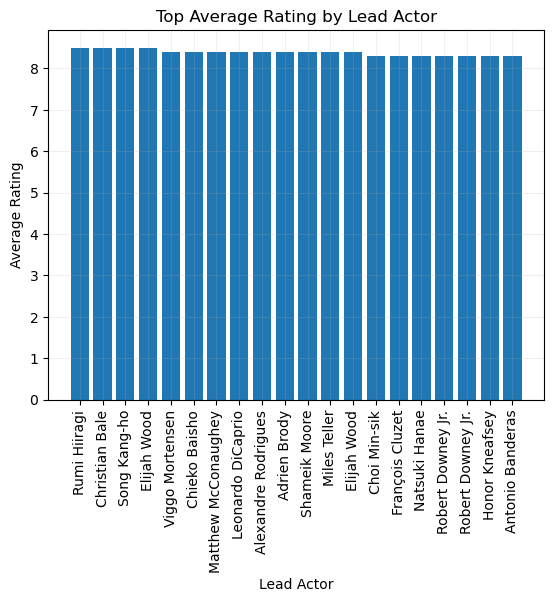

<Figure size 640x480 with 0 Axes>

In [135]:
# Top 10-20 Actors based on Ratings
actor_rate = df[["Average Rating (Out of 10)", "1st Billing", "Title"]]

#sort to highest rating
top_actor_rate = actor_rate.sort_values("Average Rating (Out of 10)", ascending=False).head(20)
top_actor_rate = top_actor_rate[["1st Billing", "Average Rating (Out of 10)"]]
top_actor_rate.set_index("1st Billing", inplace=True)
top_actor_rate

#Create rating graph - actor by rating and written anaylysis to compare
x = np.arange(len(top_actor_rate))
tic_loc = [value for value in x]

plt.bar(x, top_actor_rate["Average Rating (Out of 10)"], align='center')
plt.xticks(tic_loc, top_actor_rate.index, rotation="vertical")
plt.xlabel("Lead Actor")
plt.ylabel("Average Rating")
plt.title("Top Average Rating by Lead Actor")
plt.yscale("linear")
plt.grid(alpha=.2)
plt.show()

plt.savefig('../../Analysis/Visualizations/batch2_topactorbyrating.png')



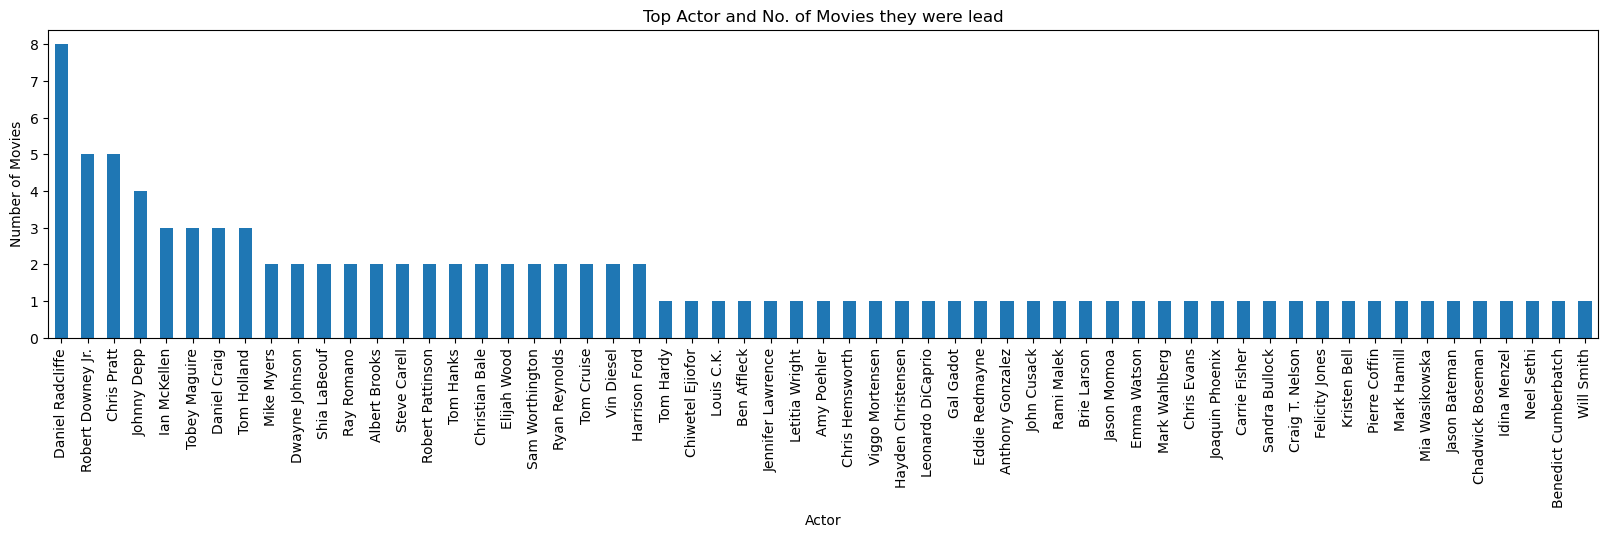

In [136]:
# Is there an Lead Actor that starred in more than 1 Movie that is part of the Top 100 Movies based on revenue
#Sort to highest revenue
top_100_rev = actor_rev.sort_values("Gross Revenue", ascending=False).head(100)

#Count Recurring Lead Actor

topactor = top_100_rev["1st Billing"].value_counts()
topactor
fig = topactor.plot(kind = 'bar', figsize = (20, 4), 
                    title="Top Actor and No. of Movies they were lead", 
                    xlabel="Actor", 
                    ylabel="Number of Movies")
labels = topactor.index

plt.savefig('../../Analysis/Visualizations/batch2_topactormorethan1movie.png')

In [137]:
actor_rev = df[["Gross Revenue", "1st Billing"]]
top_100_rev = actor_rev.sort_values("Gross Revenue", ascending=False).head(100)

topactor_rev100 = top_100_rev.groupby(["1st Billing"])
total_top_actor_rev100 = topactor_rev100[['Gross Revenue']].sum()
sort_total_top_actor_rev100 = total_top_actor_rev100.sort_values("Gross Revenue", ascending = False).head(100)
sort_total_top_actor_rev100




,Gross Revenue
1st Billing,
Robert Downey Jr.,8986943208
Daniel Radcliffe,7706878644
Chris Pratt,5620514471
Sam Worthington,5243956307
Tom Holland,3933942031
Johnny Depp,3868295912
Ian McKellen,2935523356
Harrison Ford,2854859657
Daniel Craig,2797298911


In [152]:
#Gross Total of Top 100 by Actor
actor_rev = df[["Gross Revenue", "1st Billing"]]
top_100_rev = actor_rev.sort_values("Gross Revenue", ascending=False).head(100)
topactor_rev100 = top_100_rev.groupby(["1st Billing"])
total_top_actor_rev100 = topactor_rev100[['Gross Revenue']].sum()
sort_total_top_actor_rev30 = total_top_actor_rev100.sort_values("Gross Revenue", ascending = False).head(30)
sort_total_top_actor_rev30
#Number of Movies by actor in top 100 - showing only top 30
topactor = top_100_rev["1st Billing"].value_counts().head(30)
topactor


Daniel Radcliffe     8
Robert Downey Jr.    5
Chris Pratt          5
Johnny Depp          4
Ian McKellen         3
Tobey Maguire        3
Daniel Craig         3
Tom Holland          3
Mike Myers           2
Dwayne Johnson       2
Shia LaBeouf         2
Ray Romano           2
Albert Brooks        2
Steve Carell         2
Robert Pattinson     2
Tom Hanks            2
Christian Bale       2
Elijah Wood          2
Sam Worthington      2
Ryan Reynolds        2
Tom Cruise           2
Vin Diesel           2
Harrison Ford        2
Tom Hardy            1
Chiwetel Ejiofor     1
Louis C.K.           1
Ben Affleck          1
Jennifer Lawrence    1
Letitia Wright       1
Amy Poehler          1
Name: 1st Billing, dtype: int64

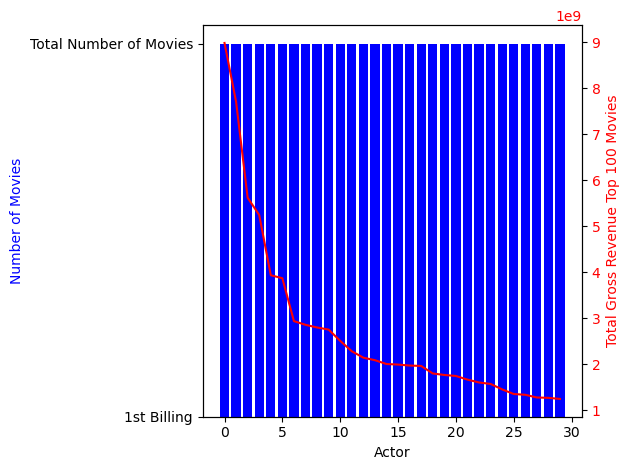

In [153]:
x = np.arange(len(sort_total_top_actor_rev100))

fig, ax1 = plt.subplots()

color = 'blue'
ax1.set_xlabel('Actor')
ax1.set_ylabel('Number of Movies', color=color)
ax1.bar(x, ["1st Billing"], color=color)
ax1.bar(x, ["Total Number of Movies"], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'red'
ax2.set_ylabel('Total Gross Revenue Top 100 Movies', color=color)  # we already handled the x-label with ax1
ax2.plot(x, sort_total_top_actor_rev100["Gross Revenue"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


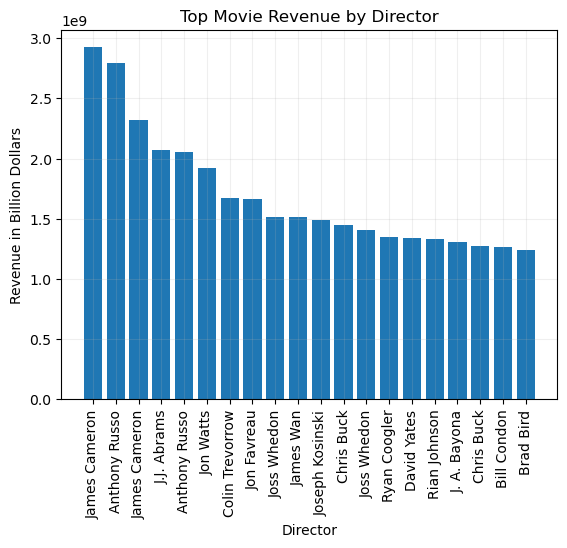

<Figure size 640x480 with 0 Axes>

In [87]:
# Top 10-20 Directors based on Movie revenue
director_rev = df[["Gross Revenue", "Director", "Title"]]
#Sort to highest revenue
top_dir_rev = director_rev.sort_values("Gross Revenue", ascending=False).head(20)
top_dir_rev.set_index("Director", inplace=True)
top_dir_rev

x = np.arange(len(top_dir_rev))
tic_loc = [value for value in x]

plt.bar(x, top_dir_rev["Gross Revenue"], align='center')
plt.xticks(tic_loc, top_dir_rev.index, rotation="vertical")
plt.xlabel("Director")
plt.ylabel("Revenue in Billion Dollars")
plt.title("Top Movie Revenue by Director")
plt.yscale("linear")
plt.grid(alpha=.2)

plt.show()
plt.savefig('../../Analysis/Visualizations/batch2_topdirectorbyrevenue.png')

In [88]:
top_dir_rev


,Gross Revenue,Title
Director,,
James Cameron,2923706026,Avatar
Anthony Russo,2794731755,Avengers: Endgame
James Cameron,2320250281,Avatar: The Way of Water
J.J. Abrams,2068223624,Star Wars: The Force Awakens
Anthony Russo,2052415039,Avengers: Infinity War
Jon Watts,1921847111,Spider-Man: No Way Home
Colin Trevorrow,1671537444,Jurassic World
Jon Favreau,1663075401,The Lion King
Joss Whedon,1518815515,The Avengers


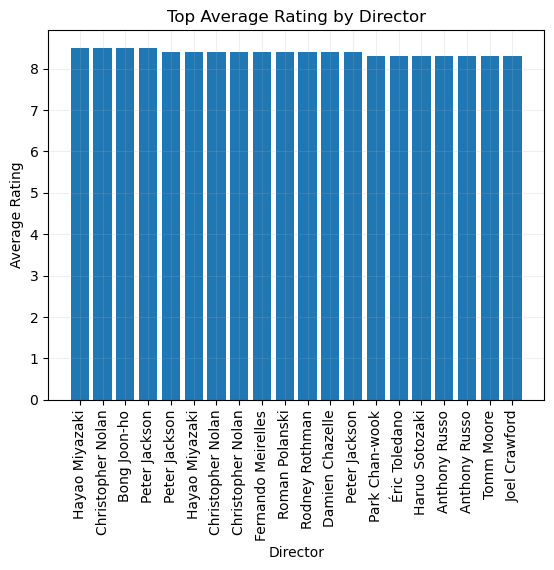

<Figure size 640x480 with 0 Axes>

In [89]:
# Top 20 Directors based on Ratings
dir_rate = df[["Average Rating (Out of 10)", "Director", "Title"]]

#sort to highest rating
top_dir_rate = dir_rate.sort_values("Average Rating (Out of 10)", ascending=False).head(20)
top_dir_rate = top_dir_rate[["Director", "Average Rating (Out of 10)"]]
top_dir_rate.set_index("Director", inplace=True)
top_dir_rate

#Create rating graph - actor by rating and written anaylysis to compare
x = np.arange(len(top_dir_rate))
tic_loc = [value for value in x]

plt.bar(x, top_dir_rate["Average Rating (Out of 10)"], align='center')
plt.xticks(tic_loc, top_dir_rate.index, rotation="vertical")
plt.xlabel("Director")
plt.ylabel("Average Rating")
plt.title("Top Average Rating by Director")
plt.yscale("linear")
plt.grid(alpha=.2)
plt.show()

plt.savefig('../../Analysis/Visualizations/batch2_topdirectorbyrating.png')

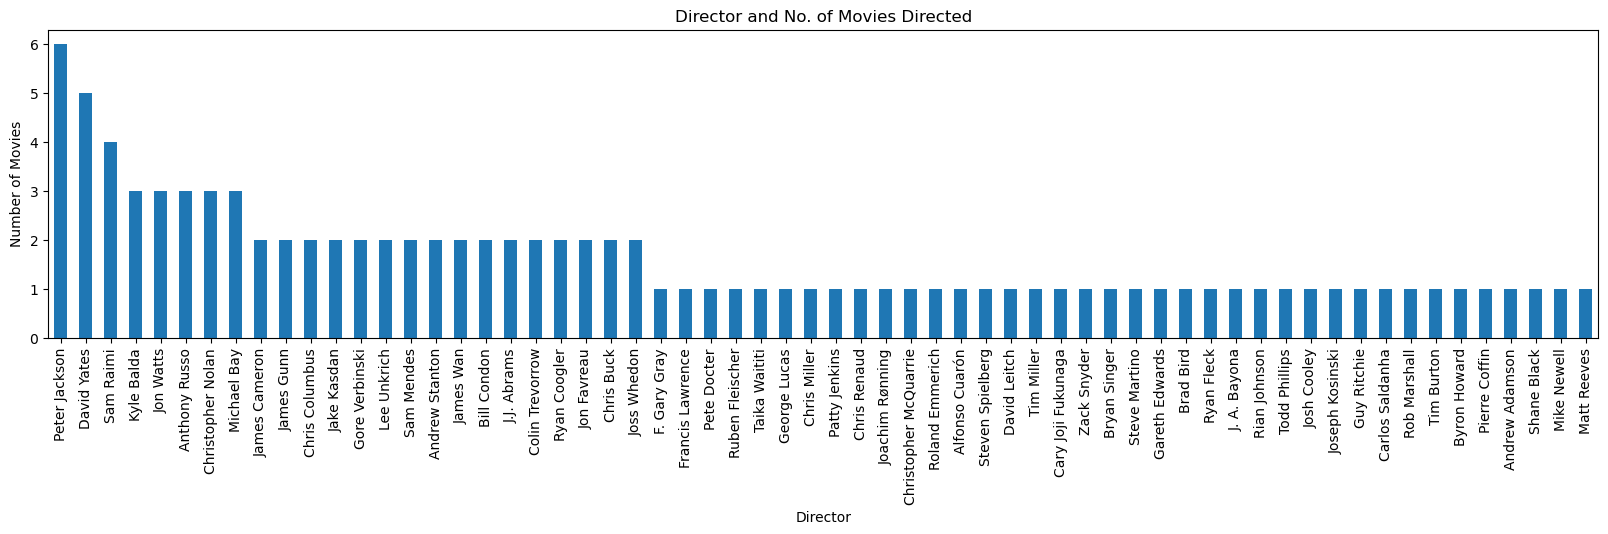

In [90]:
# Is there a Director who directed more than 1 Movie that is part of the Top 100 Movies based on revenue
top_100_rev = director_rev.sort_values("Gross Revenue", ascending=False).head(100)

#Count Recurring Lead Actor

top_dir = top_100_rev["Director"].value_counts()
top_dir
fig = top_dir.plot(kind = 'bar', figsize = (20, 4), 
                    title="Director and No. of Movies Directed", 
                    xlabel="Director", 
                    ylabel="Number of Movies")
labels = top_dir.index

plt.savefig('../../Analysis/Visualizations/batch2_topdirectormorethan1movie.png')

In [91]:
# Q3 Movie rating's correlation to revenue
#Create a graph showing revenue and ratings by year
#Ideas:
    # Show Top 10 Movies with highest ratings and their revenue - answered in the graphs aboves
    # Is the movie with the highest rating, also have the highest revenue? - answered in the graphs aboves

    

In [92]:
   # What is the rating of the movie with the Lowest Revenue?
    
lowrev = df[["Title", "Gross Revenue"]]
lowest_rev = lowrev.sort_values("Gross Revenue").head(3)
lowest_rev = lowest_rev[["Title", "Gross Revenue"]]
lowest_rev.set_index("Title", inplace=True)
lowest_rev

,Gross Revenue
Title,
Kickboxer: Retaliation,4537
Area 51,7556
Overdrive,7793


In [93]:
  # What is the rating of the movie with the Highest Revenue?
highrev = df[["Title", "Gross Revenue"]]
highest_rev = highrev.sort_values("Gross Revenue", ascending=False).head(3)
highest_rev = highest_rev[["Title", "Gross Revenue"]]
highest_rev.set_index("Title", inplace=True)
highest_rev

,Gross Revenue
Title,
Avatar,2923706026
Avengers: Endgame,2794731755
Avatar: The Way of Water,2320250281


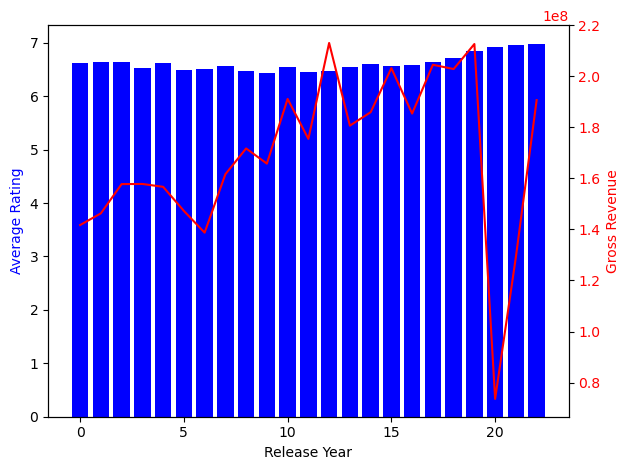

In [124]:
#Create a graph showing revenue and ratings by year (Revenue answered in batch 1)
rateyear_df = df[["Release Year", "Average Rating (Out of 10)", "Gross Revenue"]].copy()

#Group the data by Year and run sum() method to obtain totals
group_year = rateyear_df.groupby(["Release Year"])
rate_by_year = group_year.mean()

#Build and show revenue by month averages based on rev_by_mnth 
year_labels = ["2000", "2001", "2002", "2003", "2004", "2005", "2006",
                "2007", "2008", "2009", "2010", "2011", "2012", "2013",
              "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]

x = np.arange(len(rate_by_year))

fig, ax1 = plt.subplots()

color = 'blue'
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Average Rating', color=color)
ax1.bar(x, rate_by_year["Average Rating (Out of 10)"], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'red'
ax2.set_ylabel('Gross Revenue', color=color)  # we already handled the x-label with ax1
ax2.plot(x, rate_by_year["Gross Revenue"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



In [ ]:
# Top 10-20 Actors based on Ratings
actor_rate = df[["Average Rating (Out of 10)", "1st Billing", "Title"]]

#sort to highest rating
top_actor_rate = actor_rate.sort_values("Average Rating (Out of 10)", ascending=False).head(20)
top_actor_rate = top_actor_rate[["1st Billing", "Average Rating (Out of 10)"]]
top_actor_rate.set_index("1st Billing", inplace=True)
top_actor_rate


#Top 10-20 Actors based on Movie revenue
actor_rev = df[["Gross Revenue", "1st Billing", "Title"]]

#Sort to highest revenue
top_actor_rev = actor_rev.sort_values("Gross Revenue", ascending=False).head(20)
top_actor_rev = top_actor_rev[["1st Billing", "Gross Revenue"]]
top_actor_rev.set_index("1st Billing", inplace=True)
top_actor_rev

x = np.arange(len(rate_by_year))

fig, ax1 = plt.subplots()

color = 'blue'
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Average Rating', color=color)
ax1.bar(x, rate_by_year["Average Rating (Out of 10)"], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'red'
ax2.set_ylabel('Gross Revenue', color=color)  # we already handled the x-label with ax1
ax2.plot(x, rate_by_year["Gross Revenue"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()